<a href="https://colab.research.google.com/github/shubhangi0001/PRODIGY_DS/blob/main/PRODIGY_DS_Task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRODIGY_DS_TASK-02

### Perform Data Cleaning and EDA on a dataset of your choice, such as the titanic dataset from Kaggle. Explore the relationship between variables abd identify patterns and trends in the data.

### Generate Titanic Dataset

In [4]:
import pandas as pd
import numpy as np
import random
import string

random.seed(42)

def generate_name():
    first_names = ['John', 'Jane', 'Michael', 'Emily', 'William', 'Olivia', 'James', 'Emma', 'Alexander', 'Sophia']
    last_names = ['Smith', 'Johnson', 'Williams', 'Brown', 'Jones', 'Garcia', 'Miller', 'Davis', 'Rodriguez', 'Martinez']
    return random.choice(first_names) + ' ' + random.choice(last_names)

def generate_titanic_dataset(num_passengers=1000):
    data = []
    for _ in range(num_passengers):
        pclass = random.choice([1, 2, 3])
        name = generate_name()
        sex = random.choice(['male', 'female'])
        age = random.randint(1, 80)
        siblings_spouses = random.randint(0, 8)
        parents_children = random.randint(0, 6)
        ticket = ''.join(random.choices(string.ascii_uppercase + string.digits, k=8))
        fare = round(random.uniform(10, 200), 2)
        cabin = random.choice(['A', 'B', 'C', 'D', 'E', 'F', 'G']) + str(random.randint(1, 100))
        embarkation_port = random.choice(['C', 'Q', 'S'])
        survived = random.choice([0, 1])
        data.append([pclass, name, sex, age, siblings_spouses, parents_children, ticket, fare, cabin, embarkation_port, survived])

    df = pd.DataFrame(data, columns=['Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'])

    return df

titanic_df = generate_titanic_dataset()
titanic_df.to_csv('titanic_dataset.csv', index=False)


### Data Cleaning

*   Handling Missing Values
*   Encoding Categorical Variables
*   Drop Unnecessary Columns
*   Feature Scaling





1. Handling Missing Values

In [5]:
mean_age = titanic_df['Age'].mean()
titanic_df['Age'].fillna(mean_age, inplace=True)
titanic_df['Cabin'].fillna('Unknown', inplace=True)


2. Encoding Categorical Variables

In [6]:
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'])


3. Drop Unnecessary Columns

In [7]:
titanic_df.drop(['Name', 'Ticket'], axis=1, inplace=True)


4. Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
titanic_df[['Age', 'Fare']] = scaler.fit_transform(titanic_df[['Age', 'Fare']])


### Performing Exploratory Data Analysis (EDA)

*   Load the Dataset
*   Summary Statistics
*   Distribution of Survival
*   Explore Categorical Variables
*   Explore Numerical Variable
*   Correlation Analysis





1. Load the Dataset

In [9]:
import pandas as pd

titanic_df = pd.read_csv('titanic_dataset.csv')


2. Summary Statistics

In [10]:
summary_stats = titanic_df.describe()
print(summary_stats)


            Pclass         Age  Siblings/Spouses Aboard  \
count  1000.000000  1000.00000              1000.000000   
mean      1.953000    40.98100                 3.905000   
std       0.826725    23.44475                 2.588566   
min       1.000000     1.00000                 0.000000   
25%       1.000000    20.00000                 2.000000   
50%       2.000000    42.00000                 4.000000   
75%       3.000000    62.00000                 6.000000   
max       3.000000    80.00000                 8.000000   

       Parents/Children Aboard         Fare     Survived  
count               1000.00000  1000.000000  1000.000000  
mean                   3.06500   102.805670     0.529000  
std                    2.00968    54.192459     0.499408  
min                    0.00000    10.080000     0.000000  
25%                    1.00000    54.642500     0.000000  
50%                    3.00000   104.545000     1.000000  
75%                    5.00000   147.902500     1.00000

3. Distribution of Survival

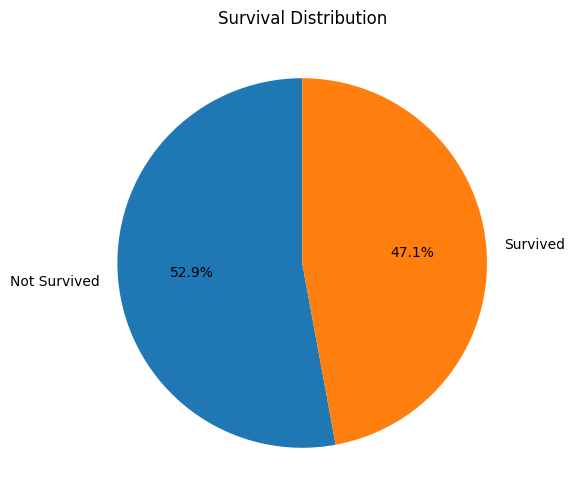

In [11]:
import matplotlib.pyplot as plt

survival_counts = titanic_df['Survived'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution')
plt.show()


4. Explore Categorical Variables

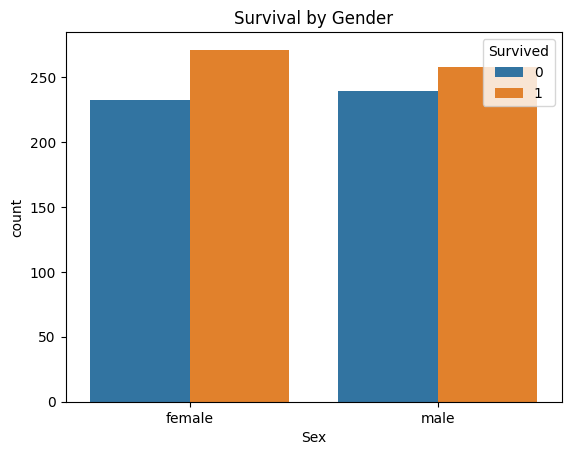

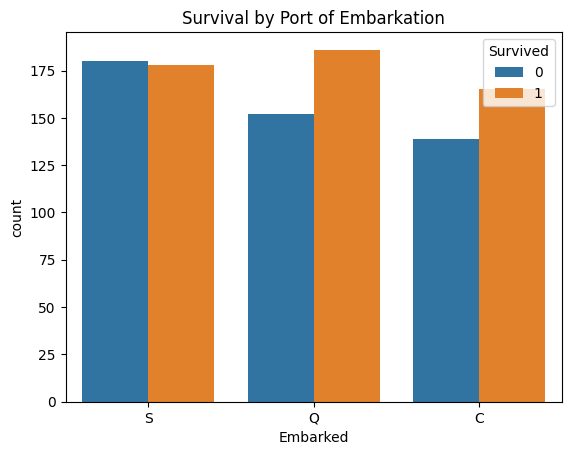

In [12]:
import seaborn as sns

sns.countplot(x='Sex', hue='Survived', data=titanic_df)
plt.title('Survival by Gender')
plt.show()

sns.countplot(x='Embarked', hue='Survived', data=titanic_df)
plt.title('Survival by Port of Embarkation')
plt.show()


5. Explore Numerical Variables

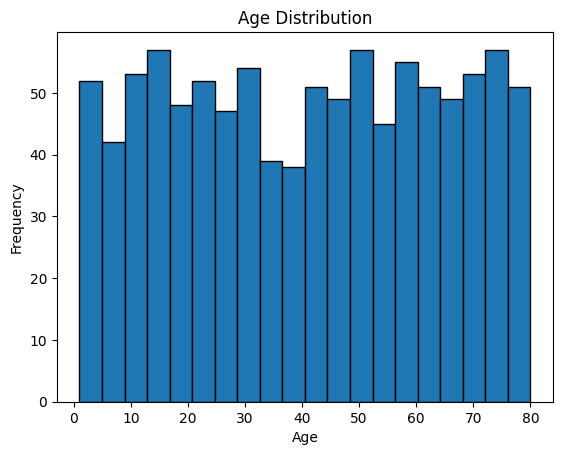

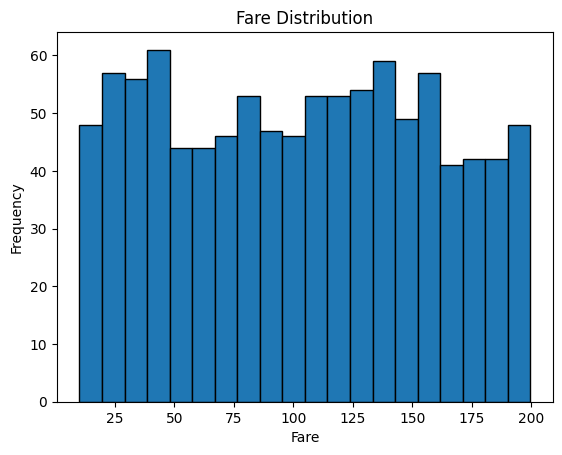

In [13]:
plt.hist(titanic_df['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

plt.hist(titanic_df['Fare'], bins=20, edgecolor='black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution')
plt.show()


6. Correlation Analysis

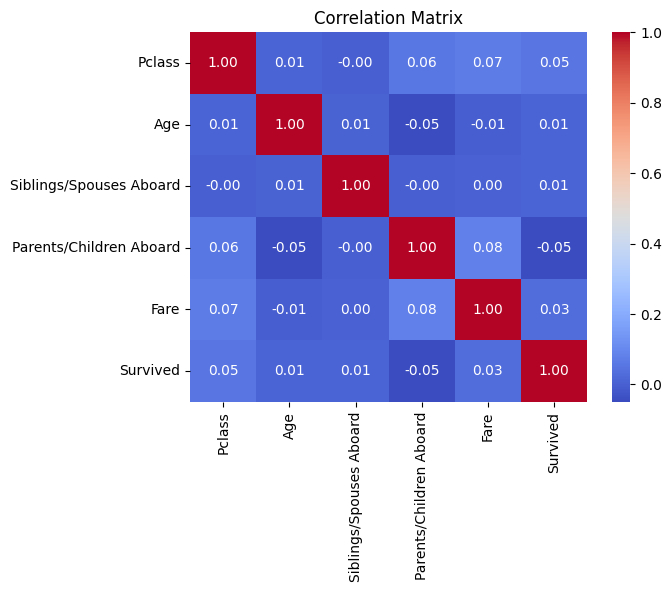

In [15]:
numeric_columns = titanic_df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = titanic_df[numeric_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


### Explore relationship between variables and identify pattern and trends in the data

*   Survival by Passenger Class and Gender
*   Age Distribution of Passengers
*   Fare Distribution by Passenger Class
*   Survival by Embarkation Port
*   Family Size and Survival





1. Survival by Passenger Class and Gender

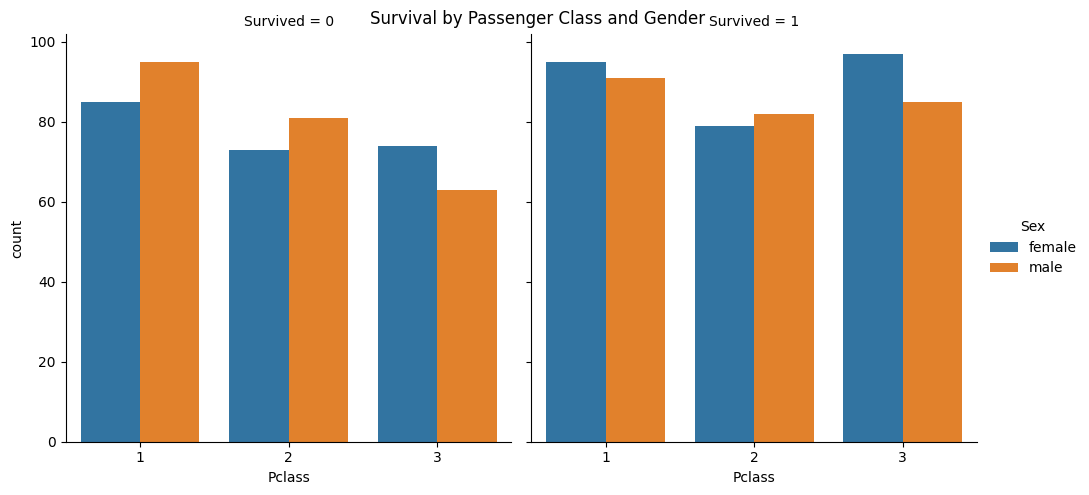

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="Pclass", hue="Sex", col="Survived", data=titanic_df, kind="count")
plt.suptitle('Survival by Passenger Class and Gender')
plt.show()


2. Age Distribution of Passengers

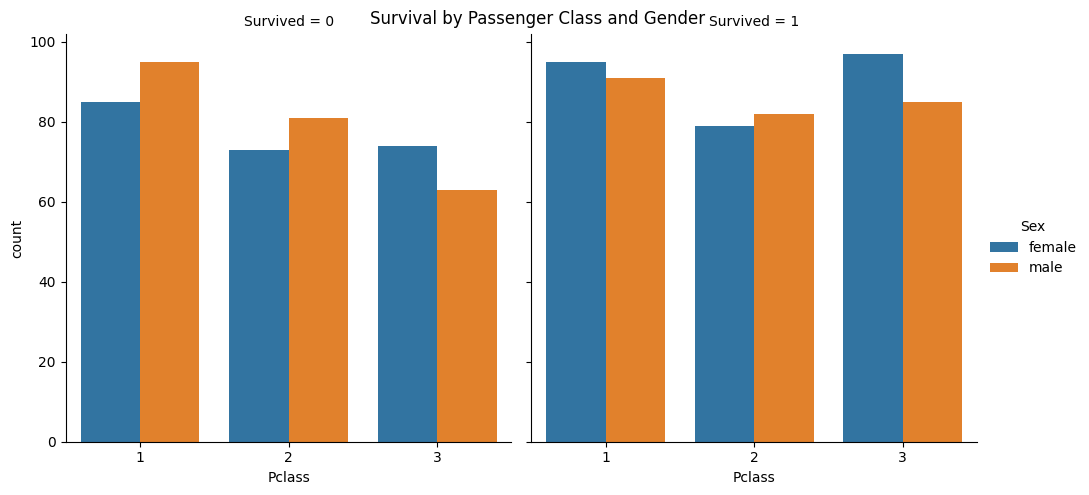

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="Pclass", hue="Sex", col="Survived", data=titanic_df, kind="count")
plt.suptitle('Survival by Passenger Class and Gender')
plt.show()


3. Fare Distribution by Passenger Class

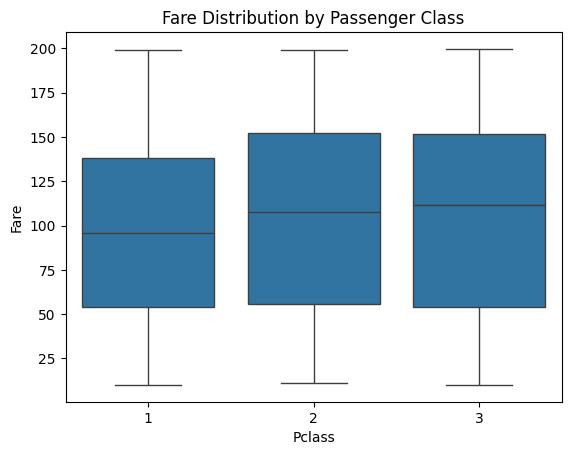

In [18]:
sns.boxplot(x="Pclass", y="Fare", data=titanic_df)
plt.title('Fare Distribution by Passenger Class')
plt.show()


4. Survival by Embarkation Port

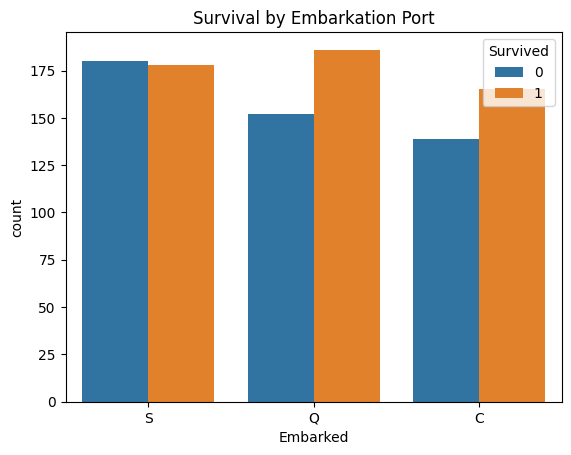

In [19]:
sns.countplot(x='Embarked', hue='Survived', data=titanic_df)
plt.title('Survival by Embarkation Port')
plt.show()


5. Family Size and Survival

<ipython-input-20-725efd2d7a70>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Family_Size', y='Survived', data=titanic_df, ci=None)


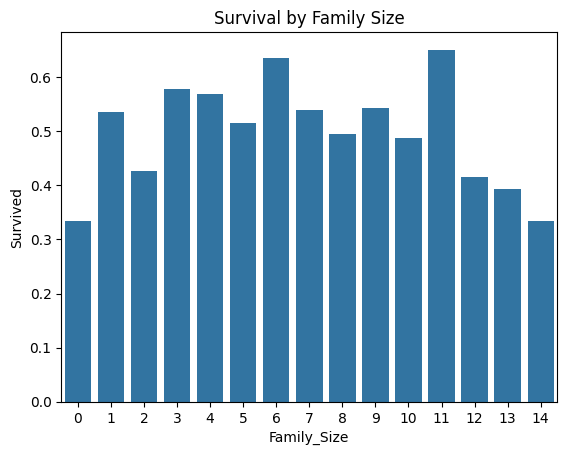

In [20]:
titanic_df['Family_Size'] = titanic_df['Siblings/Spouses Aboard'] + titanic_df['Parents/Children Aboard']
sns.barplot(x='Family_Size', y='Survived', data=titanic_df, ci=None)
plt.title('Survival by Family Size')
plt.show()
